In [206]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

output_directory = '/home/marco/DataspellProjects/thesis/output/visualization/'

palette = sns.color_palette(["#2176AB", "#F97662", "#FFBF00", "#50C878", "#B284BE"])
sns.set_palette(palette)

df = pd.read_csv('../../data/ST002498.csv')
df.describe()

,Diagnosis,PreBioPSA,PreviousPositiveBiopsy,Age,EthnicityLatino,Ethnicity,Employment,Education,SmokingEver,FamilyHistoryPrCa,...,X-25948,X-25957,X-26008,X-26054,X-26062,X-26097,X-26107,X-26109,X-26111,X-26119
count,580.000000,576.000000,580.0,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,...,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000,580.000000
mean,0.460345,6.813646,0.0,64.656897,0.058621,3.624138,3.081034,4.912069,0.494828,0.267241,...,17.823704,21.024914,18.816201,17.085630,18.073313,18.687156,19.967458,16.177219,19.919818,16.733838
std,0.498855,8.587811,0.0,8.615839,0.249375,8.210746,2.522846,1.401033,0.507261,0.454449,...,0.632803,0.434979,1.078822,0.583163,1.586642,0.399466,0.578993,0.962527,1.763196,0.647451
min,0.000000,0.260000,0.0,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.231127,19.810562,15.241360,15.705137,15.876781,17.261185,18.148216,13.215355,15.415103,14.919162
25%,0.000000,3.797500,0.0,59.000000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,...,17.467665,20.749175,18.188942,16.699573,17.162485,18.444661,19.617056,15.482880,18.883770,16.344822
50%,0.000000,5.085000,0.0,65.000000,0.000000,1.000000,1.000000,5.000000,0.000000,0.000000,...,17.741580,21.015685,18.718996,17.029602,17.472598,18.673609,19.987181,16.166960,20.071686,16.676137
75%,1.000000,7.200000,0.0,70.000000,0.000000,1.000000,6.000000,6.000000,1.000000,1.000000,...,18.093447,21.263365,19.330017,17.419523,18.409770,18.906863,20.360499,16.892829,21.162857,17.037447
max,1.000000,144.400000,0.0,85.000000,2.000000,32.000000,10.000000,6.000000,2.000000,2.000000,...,22.569396,23.766016,24.646175,19.886690,25.833702,20.890860,21.441073,19.305017,26.487071,20.912917


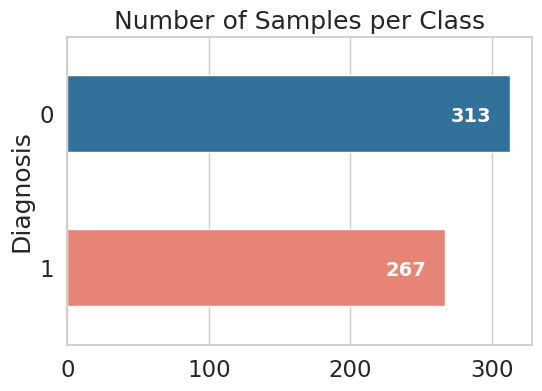

In [207]:
plt.figure(figsize=(6, 4))
sns.countplot(y=df.Diagnosis, data=df, width=0.5)
plt.xlabel("")

#printing total number of classes over the bar
for index, value in enumerate(df.Diagnosis.value_counts()):
    plt.text(value - 42, index + 0.05, str(value), color='white', fontweight='bold', fontsize=14)
plt.title("Number of Samples per Class")
plt.savefig(output_directory + "count_of_each_target_class.png")


In [208]:
#psa levels by diagnosis

psa_levels = df.groupby('Diagnosis')['PreBioPSA']
psa_levels.describe()

,count,mean,std,min,25%,50%,75%,max
Diagnosis,,,,,,,,
0,310.0,5.824710,4.756443,0.26,3.6125,4.89,6.7300,60.5
1,266.0,7.966165,11.452822,0.43,4.0000,5.27,7.9475,144.4


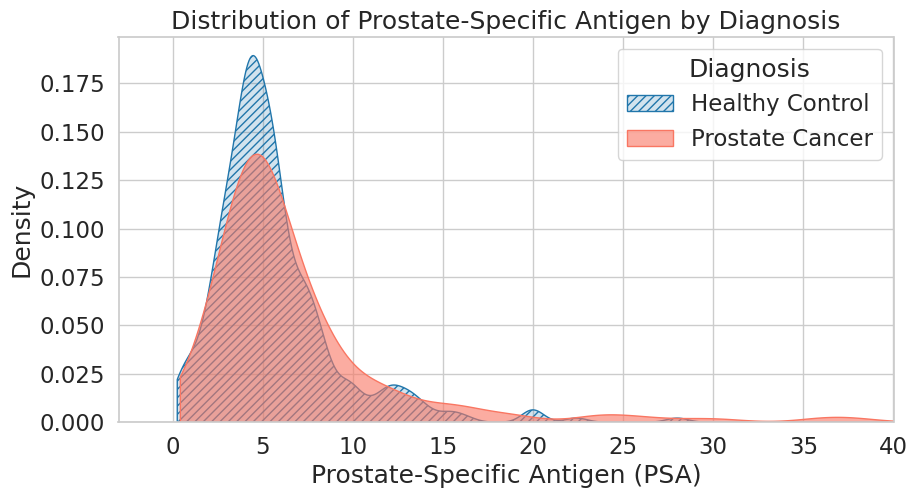

In [209]:
x = "PreBioPSA"
y = "Diagnosis"

plt.figure(figsize=(10, 5))
plt.title("Distribution of Prostate-Specific Antigen by {}".format(y))

plt.xlabel("Prostate-Specific Antigen (PSA)")
plt.ylabel("Density")
#plot the distribution of the variable
#sns.kdeplot(df, x=x, hue=y, fill=True, alpha=.4, bw_adjust=.5, cut=0, common_norm=True, gridsize=1000, lw=0)
sns.kdeplot(df.loc[df[y] == 0, x], label="y=0", fill=True, alpha=.2, bw_adjust=.4, cut=0, gridsize=1000, lw=1, hatch='////')
sns.kdeplot(df.loc[df[y] == 1, x], label="y=1", fill=True, alpha=.6, bw_adjust=.4, cut=0, gridsize=1000, lw=1)

plt.legend(title="Diagnosis", loc="upper right", labels=['Healthy Control', 'Prostate Cancer'])
sns.set(style="whitegrid", font_scale=1.5)
#set x-axis limit
plt.xlim(-3, 40)
plt.savefig(output_directory + x + "_" + y + "_distribution.png")

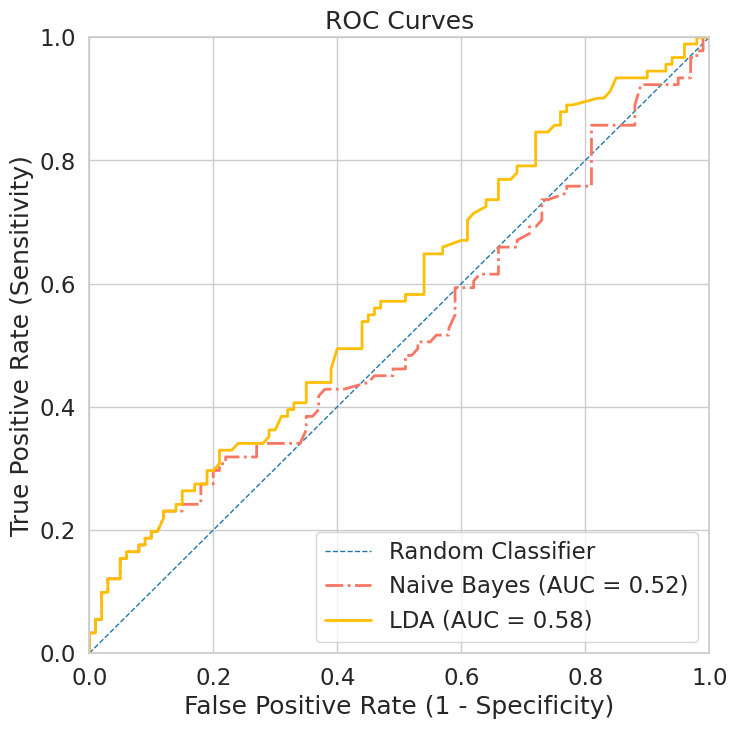

In [210]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt

psa_df = df[['PreBioPSA', 'Diagnosis']].dropna()

psa_X = psa_df.drop('Diagnosis', axis=1)
psa_y = psa_df['Diagnosis']

X_train, X_test, y_train, y_test = train_test_split(psa_X, psa_y, test_size=0.33, random_state=42)

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_prob_nb = nb_classifier.predict_proba(X_test)[:, 1]
auc_score_nb = roc_auc_score(y_test, y_pred_prob_nb)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_prob_nb)

lda_classifier = LinearDiscriminantAnalysis(shrinkage='auto', solver='eigen')
lda_classifier.fit(X_train, y_train)
y_pred_prob_lda = lda_classifier.predict_proba(X_test)[:, 1]
auc_score_lda = roc_auc_score(y_test, y_pred_prob_lda)
fpr_lda, tpr_lda, _ = roc_curve(y_test, y_pred_prob_lda)

plt.figure(figsize=(8, 8))

plt.plot([0, 1], [0, 1], lw=1, linestyle='--', color=palette[0], label='Random Classifier')
plt.plot(fpr_nb, tpr_nb, lw=2, color=palette[1], label='Naive Bayes (AUC = %0.2f)' % auc_score_nb, linestyle='-.')
plt.plot(fpr_lda, tpr_lda, lw=2, color=palette[2], label='LDA (AUC = %0.2f)' % auc_score_lda)


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.savefig(output_directory + "PreBioPSA_Diagnosis_roc_curve.png")


In [211]:
from scipy.stats import ttest_ind, mannwhitneyu

df.dropna(inplace=True)
# Trasforma la variabile PreBioPSA applicando il logaritmo naturale per rendere la distribuzione normale
df['PreBioPSA_log'] = df['PreBioPSA']

# Esegui il t-test e il test di Mann-Whitney
t_statistic, t_p_value = ttest_ind(df.loc[df['Diagnosis'] == 0, 'PreBioPSA_log'], df.loc[df['Diagnosis'] == 1, 'PreBioPSA_log'])
u_statistic, u_p_value = mannwhitneyu(df.loc[df['Diagnosis'] == 0, 'PreBioPSA'], df.loc[df['Diagnosis'] == 1, 'PreBioPSA'])

print("Risultati del t-test con PreBioPSA log-transformata:")
print("Valore p:", t_p_value)
print("Significativo" if t_p_value < 0.05 else "Non significativo")

print("\nRisultati del test di Mann-Whitney con PreBioPSA:")  
print("Valore p:", u_p_value)
print("Significativo" if u_p_value < 0.05 else "Non significativo")


Risultati del t-test con PreBioPSA log-transformata:
Valore p: 0.002777798803370699
Significativo

Risultati del test di Mann-Whitney con PreBioPSA:
Valore p: 0.012847619230207476
Significativo


#2D density plot for sarcosine and citrate divided by Diagnosis

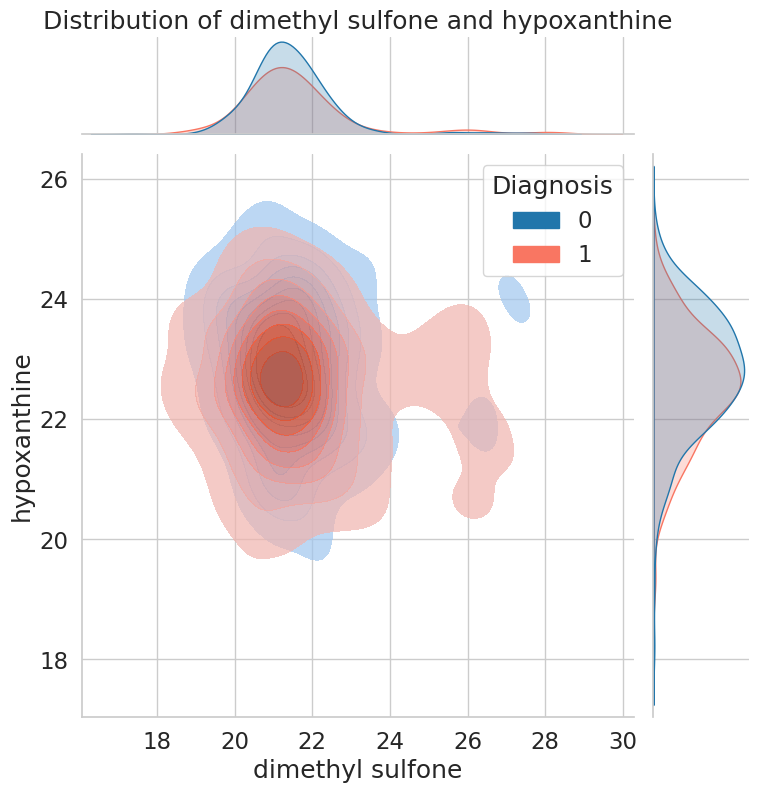

In [212]:
x = "dimethyl sulfone"
y = "hypoxanthine"
z = "Diagnosis"

# Set the style before creating the plot
sns.set(style="whitegrid", font_scale=1.5)

# Create the jointplot with the correct order of arguments
plot = sns.jointplot(x=x, y=y, data=df, hue=z, fill=True, kind='kde', alpha=.7, height=8, palette=palette[:2])
# Set labels and legend after creating the plot
plot.set_axis_labels(xlabel=x, ylabel=y)
plot.ax_marg_x.set_title("Distribution of {} and {}".format(x, y))
plot.savefig(output_directory + x + "_" + y + "_distribution.png")

Volcano plot

In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Supponiamo che tu abbia già caricato i dati in un DataFrame chiamato df

# Seleziona i metaboliti dalla colonna 'S-1-pyrroline-5-carboxylate' fino alla fine
df_metabolites = df.loc[:, 'S-1-pyrroline-5-carboxylate':]

# Aggiungi la colonna del diagnosi
df_metabolites['Diagnosis'] = df['Diagnosis']

# Calcola il fold change
fold_change = np.log2(df_metabolites.loc[df_metabolites['Diagnosis'] == 1].mean() / df_metabolites.loc[df_metabolites['Diagnosis'] == 0].mean())

# Calcola il p-value
t_stat, p_value = stats.ttest_ind(df_metabolites.loc[df_metabolites['Diagnosis'] == 0], df_metabolites.loc[df_metabolites['Diagnosis'] == 1])

# Calcola -log10(p_value)
log_p_value = -np.log10(p_value)

# Crea il DataFrame per il volcano plot
df_volcano = pd.DataFrame({'fold_change': fold_change, '-log10(p_value)': log_p_value})

/tmp/ipykernel_62060/3935564910.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t_stat, p_value = stats.ttest_ind(df_metabolites.loc[df_metabolites['Diagnosis'] == 0], df_metabolites.loc[df_metabolites['Diagnosis'] == 1])
/tmp/ipykernel_62060/3935564910.py:22: RuntimeWarning: divide by zero encountered in log10
  log_p_value = -np.log10(p_value)


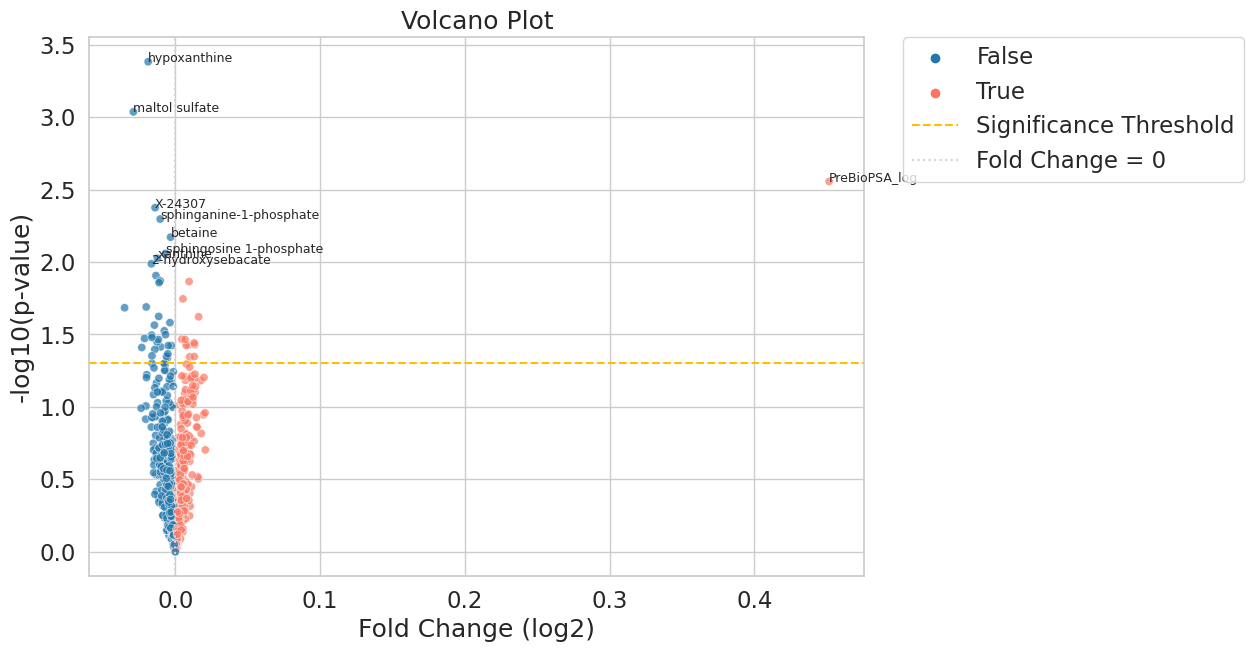

,fold_change,-log10(p_value)
Diagnosis,inf,inf
hypoxanthine,-0.018810,3.382250
maltol sulfate,-0.029023,3.036407
PreBioPSA_log,0.451699,2.556299
X-24307,-0.014037,2.374918
sphinganine-1-phosphate,-0.010503,2.296738
betaine,-0.003342,2.171430
sphingosine 1-phosphate,-0.006747,2.059445
xanthine,-0.012466,2.025724
2-hydroxysebacate,-0.016622,1.987634


In [214]:
# Crea il volcano plot
plt.figure(figsize=(10, 7))

#scatter plot with fold change on x-axis and -log10(p-value) on y-axis hue = fold change positive or negative
sns.scatterplot(x='fold_change', y='-log10(p_value)', data=df_volcano, hue=df_volcano['fold_change'] > 0, palette=palette[:2], alpha=0.7)
plt.xlabel('Fold Change (log2)')
plt.ylabel('-log10(p-value)')
plt.title('Volcano Plot')
plt.axhline(y=-np.log10(0.05), linestyle='--', label='Significance Threshold', color=palette[2])
plt.axvline(x=0, linestyle=':', label='Fold Change = 0', color="lightgrey")


# Marking top metabolites by fold change and -log10(p-value) filter = df_volcano['-log10(p_value)'] > -np.log10(0.05)
top_metabolites = df_volcano.sort_values(by=['-log10(p_value)', 'fold_change'], ascending=False)
top_metabolites = top_metabolites.loc[top_metabolites['-log10(p_value)'] > -np.log10(0.05)]
for index, row in top_metabolites.head(10).iterrows():
    plt.annotate(index, (row['fold_change'], row['-log10(p_value)']), fontsize=9)

#legend out of the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

top_metabolites